# World Happiness Report Project

# 1. Introduction

# Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


# What is Dystopia?
In the context of the World Happiness Report project, Dystopia refers to an imaginary country that represents the lowest possible levels of happiness. It serves as a benchmark against which all other countries can be compared. The purpose of Dystopia is to provide a reference point for evaluating each country's performance in terms of key variables such as GDP per Capita, Family, Life Expectancy, Freedom, Generosity, and Trust Government Corruption. By establishing Dystopia, researchers can assess how individual countries fare relative to the worst-case scenario, allowing for a more meaningful comparison of happiness levels worldwide.

# What are the residuals?
In the context of the World Happiness Report project, residuals refer to the unexplained components of the happiness score for each country. These residuals indicate the extent to which the six key variables (GDP per Capita, Family, Life Expectancy, Freedom, Generosity, and Trust Government Corruption) either over- or under-explain the average life evaluations or happiness scores.

Essentially, the residuals represent the difference between the predicted happiness score based on the six variables and the actual observed happiness score for each country. A positive residual suggests that the observed happiness score is higher than what would be expected based on the six variables, while a negative residual indicates the opposite.

It's important to note that these residuals have an average value of approximately zero over the whole set of countries, meaning that, on average, the six variables can explain the variations in happiness scores across countries. However, individual countries may have positive or negative residuals, indicating that there are additional factors contributing to their happiness levels beyond the six variables considered in the analysis.

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The columns succeeding the Happiness Score in the dataset represent various factors that contribute to evaluating the happiness level in each country. Here's a brief description of each:

1. **GDP per Capita**: This column indicates the Gross Domestic Product (GDP) per capita for each country, which is a measure of the economic output per person. Higher GDP per capita generally correlates with higher levels of happiness.

2. **Family**: This column represents the perceived social support or strength of social relationships within each country. Strong family bonds and social support networks contribute positively to overall happiness.

3. **Life Expectancy**: This column indicates the average life expectancy at birth for each country's population. Longer life expectancy is typically associated with higher levels of happiness, as it reflects better healthcare, living conditions, and overall well-being.

4. **Freedom**: This column measures the perceived freedom to make life choices within each country. Higher levels of personal and political freedom are often linked to greater happiness and satisfaction with life.

5. **Generosity**: This column reflects the prevalence of altruistic behaviors such as charitable giving and volunteerism within each country. Societies with higher levels of generosity tend to have happier populations.

6. **Trust Government Corruption**: This column represents the perceived trust in government institutions and the extent of corruption within each country. Lower levels of corruption and higher levels of trust in government are associated with higher levels of happiness.

The Dystopia Residual metric, which is provided in the dataset, combines the Dystopia Happiness Score (a benchmark representing the least happy state) with the residual value or unexplained value for each country. Adding up all these factors along with the Dystopia Residual should theoretically result in the happiness score for each country.

However, modeling these factors directly to predict happiness scores might be unreliable due to various complexities and interactions between the factors. Instead, the goal is to use machine learning techniques to predict the happiness score considering all these factors collectively.


# 2. Data Cleaning

# Import important library :

In [88]:
import warnings
warnings.simplefilter("ignore")
import pickle
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
#Rows and columns 
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 158   Number of columns: 12


In [5]:
df.head()#first 5 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df[110:130]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
110,Ukraine,Central and Eastern Europe,111,4.681,0.04412,0.79907,1.20278,0.67390,0.25123,0.02961,0.15275,1.57140
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335
112,South Africa,Sub-Saharan Africa,113,4.642,0.04585,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956
113,Ghana,Sub-Saharan Africa,114,4.633,0.04742,0.54558,0.67954,0.40132,0.42342,0.04355,0.23087,2.30919
114,Zimbabwe,Sub-Saharan Africa,115,4.610,0.04290,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191
115,Liberia,Sub-Saharan Africa,116,4.571,0.11068,0.07120,0.78968,0.34201,0.28531,0.06232,0.24362,2.77729
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
117,Sudan,Sub-Saharan Africa,118,4.550,0.06740,0.52107,1.01404,0.36878,0.10081,0.14660,0.19062,2.20857
118,Haiti,Latin America and Caribbean,119,4.518,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.03680,0.00000,1.00120,0.09806,0.22605,0.07625,0.24834,2.86712


In [7]:
df.tail()#last five rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In the earlier step, we extracted the first and last 5 rows of our dataset to understand its size and structure. We've recognized the Happiness Score as our target label, with the other columns serving as features for predicting this score.

However, I believe the categorical columns are unnecessary, and the Happiness Rank seems unimportant for predicting the Happiness Score. Further examination will validate these suspicions, leading to the removal of irrelevant columns.

**Since the Happiness Score is continuous, our task shifts to Regression analysis.**

# 3.Exploratory Data Analysis (EDA)

In [8]:
df.shape

(158, 12)

dataset comprises a total of 158 rows and 12 columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

 I observe that there are 2 columns characterized by the object data type, 1 column with integer data type, and the remaining columns consist of float data types.

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Using the `df.describe()` function, we've identified that some countries have minimum values of 0 in certain categories. Let's proceed to find the country at the bottom of each respective category.

In [11]:
df.loc[df['Health (Life Expectancy)']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [12]:
df.loc[df['Economy (GDP per Capita)']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [13]:
df.loc[df['Freedom']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [14]:
df.loc[df['Trust (Government Corruption)']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


In [15]:
df.loc[df['Generosity']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


Minimum Performance category wise

Health (Life Expectancy) -Sierra Leone

Economy (GDP per Capita)- Congo (Kinshasa)

Freedom - Iraq

Trust (Government Corruption) - Indonesia

In [16]:
# checking unique values
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

There are 10 unique values present in the 'region' category, while other categories have over 150 unique values

In [17]:
for i in df.columns:
    print (df[i].value_counts())
    print ("\n")

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

In [18]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

The Happiness Scores in the given dataframe range from 2.905 to 7.587.

In [19]:
df.duplicated().sum()

0

There are no duplicates present in the dataset.

In [20]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [21]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [22]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [23]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [24]:
df.isnull().sum().sum()

0

<Axes: >

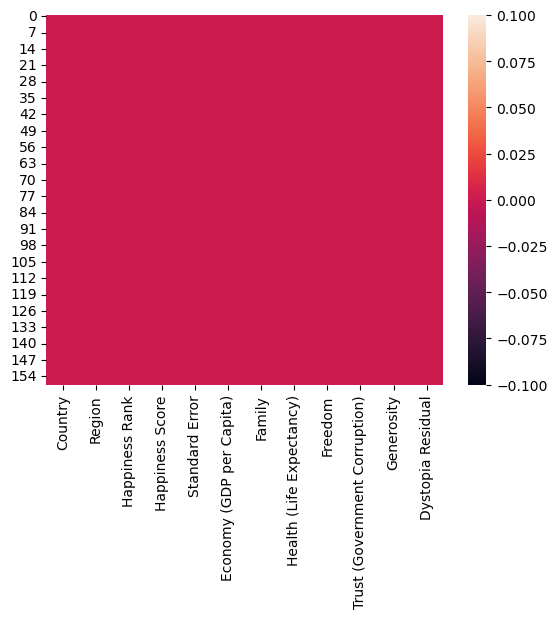

In [25]:
sns.heatmap(df.isnull())

The heatmap reveals that there are no missing values present in the dataset.

In [26]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# I'll proceed with dropping columns that do not contribute to the prediction of my target label.

In [27]:
df=df.drop(['Country','Region','Happiness Rank'],axis=1)

In [38]:
df.shape

(149, 9)

In [28]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


I have effectively removed the categorical columns 'Country' and 'Region', as well as the 'Happiness Rank', which consisted solely of sequential numeric data.

# 3. Data Visualization

# Histogram

**We will create a histogram to visually represent the distribution of the data within the dataset's columns containing continuous values.**

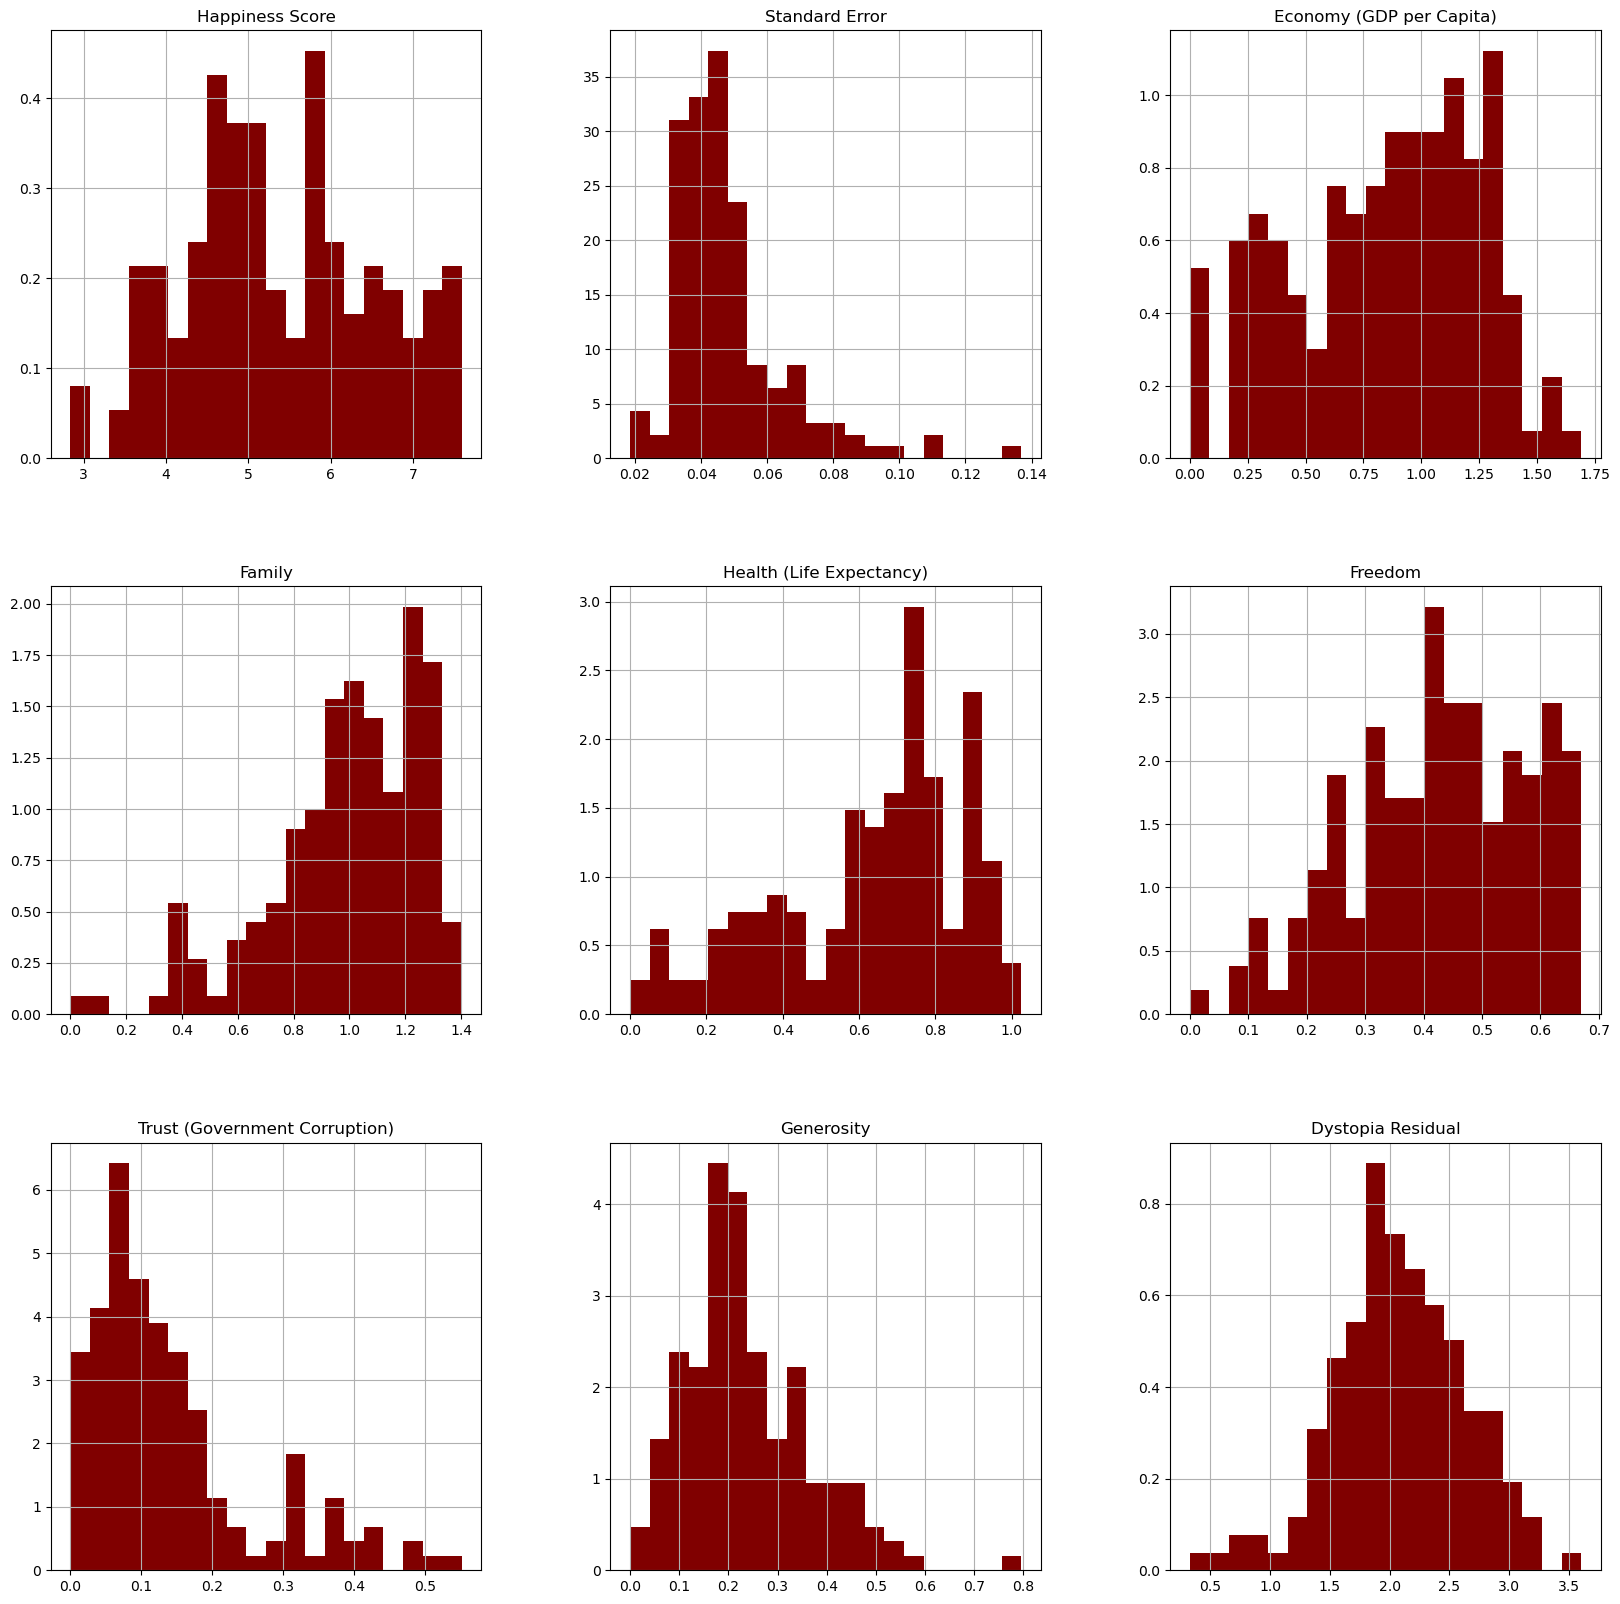

In [29]:
df.hist(bins=20,figsize=(20,20),density=True,label='value',color='maroon')
plt.show()

I've observed that the data displays a multimodal distribution and skewness, indicating a need for deeper investigation. However, a notable finding is that the maximum happiness score tends to fall within the range of 4 to 6.

# Distplot

**Detecting skewness can be achieved by utilizing distplot alongside the skew() function.**

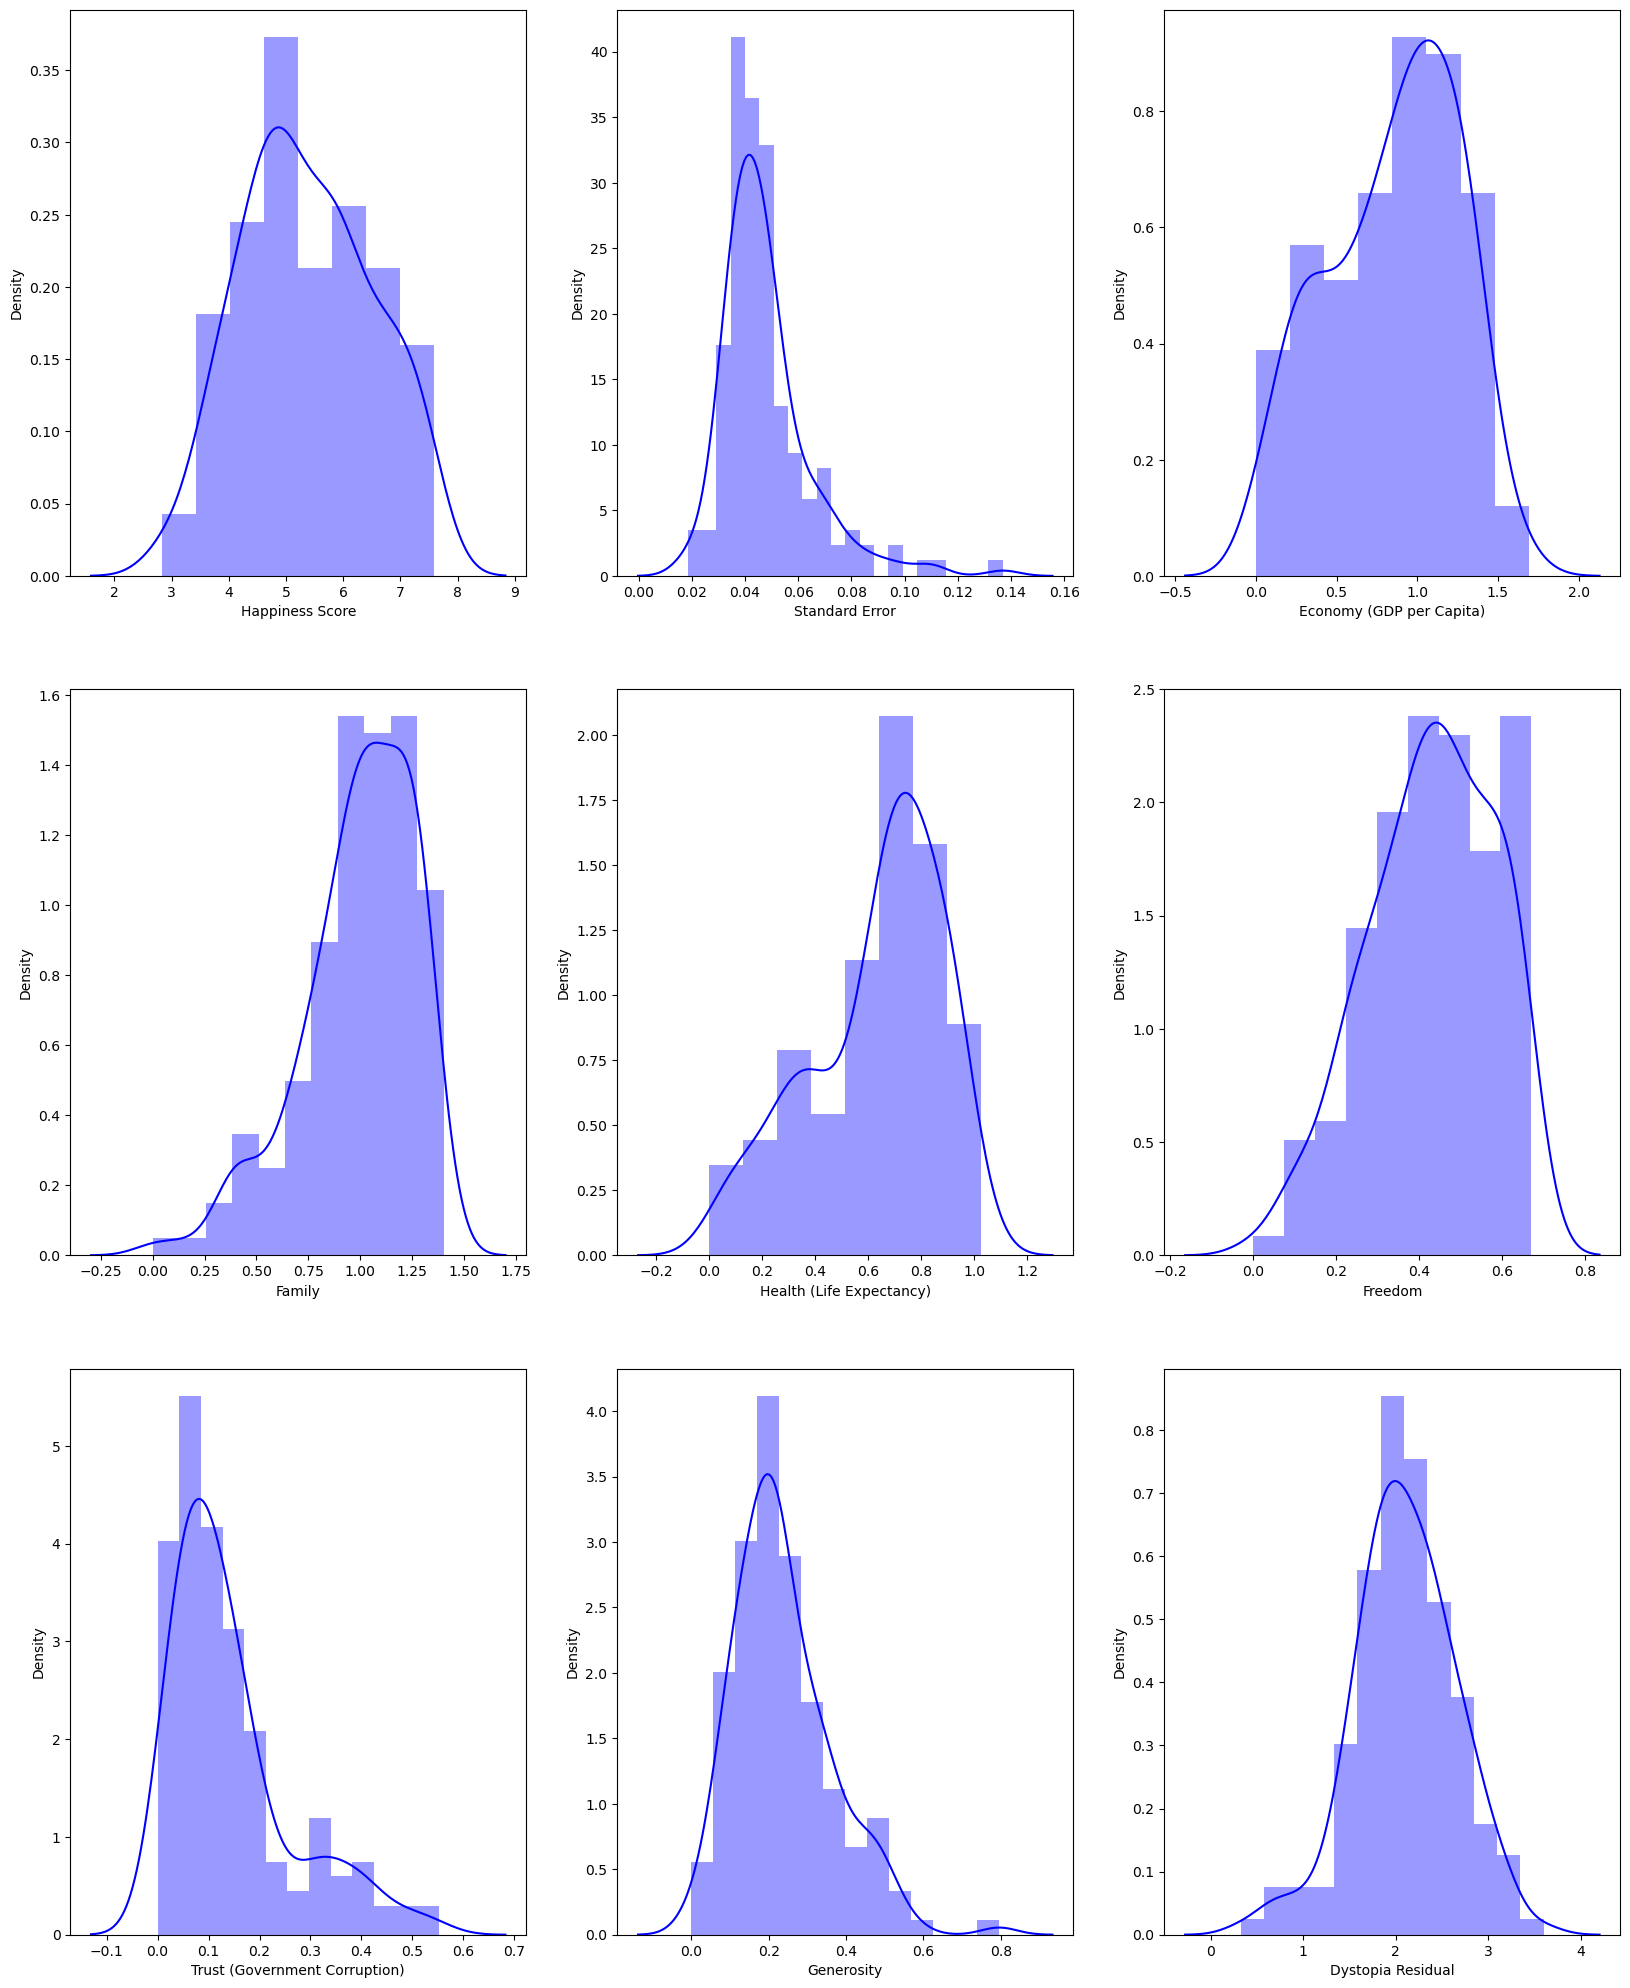

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
        

Checking the skewness of coulmns where acceptable range is between -0.5 to 0.5

In [31]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

The skew method helps us identify columns that deviate from the acceptable range of -0.5 to 0.5. This suggests the presence of outliers in our dataset that require treatment.

# boxplot

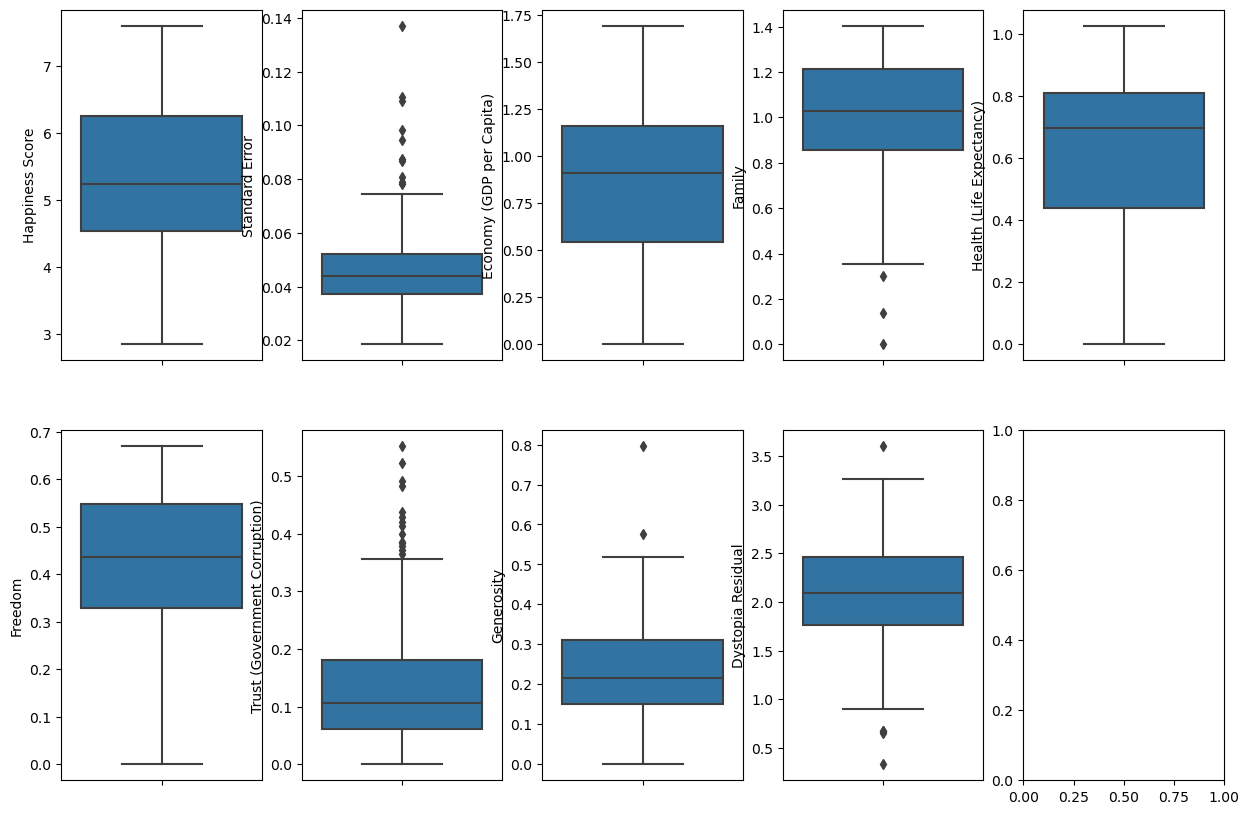

In [33]:
fig, ax=plt.subplots(ncols=5,nrows=2,figsize=(15,10))
idx=0
ax=ax.flatten()
for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[idx])
    idx+=1
plt.show()

# Outlier removal

The acceptable range for skewness lies within +/- 0.5. Notably, the feature columns exhibiting skewness are Standard Error, Freedom, Generosity, and Dystopia Residual.

# Z score method

In [34]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df=df[(z<3).all(axis=1)]
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


By employing the Z Score method, we've successfully identified and eliminated outliers from our dataset.

In [39]:
df.shape

(149, 9)

In [40]:
# Percentage of Data Loss

data_loss=(158-149)/158*100 # 158 was the number of rows in original data set and 149 after the removal of outliers
data_loss

5.69620253164557

After removing the outliers, we're assessing the data loss percentage by comparing the number of rows in our original dataset with the new dataset after outlier removal. The data loss percentage should not exceed 10 percent.

# Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

<Axes: >

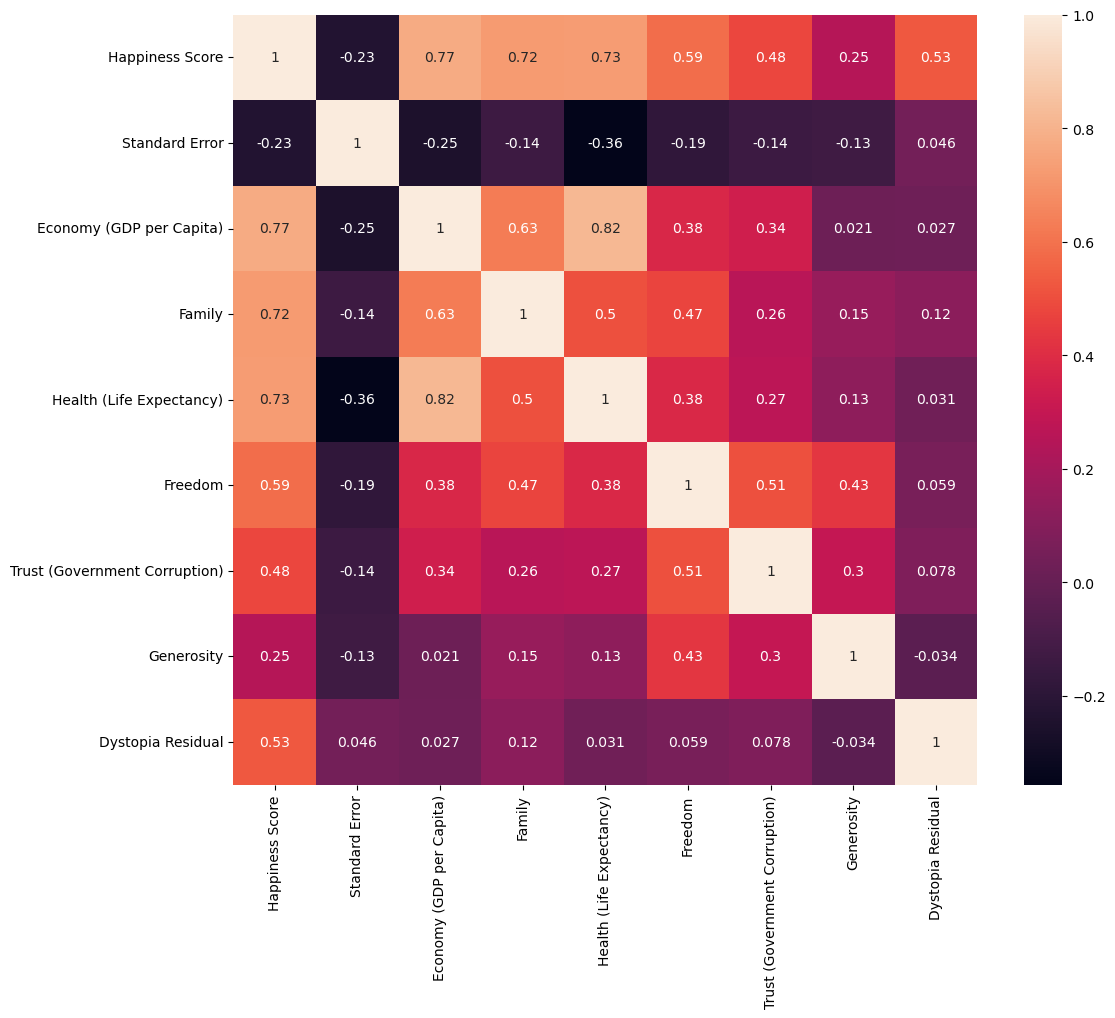

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [37]:
correlation_with_label = df.corr()['Happiness Score'].abs().sort_values(ascending=False)
print(correlation_with_label)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.773577
Health (Life Expectancy)         0.729191
Family                           0.720868
Freedom                          0.585066
Dystopia Residual                0.528334
Trust (Government Corruption)    0.477692
Generosity                       0.250903
Standard Error                   0.230252
Name: Happiness Score, dtype: float64


All columns exhibit high correlation with the label.

# 4.Preparing Data for Machine Learning

In [42]:
# Splitting

Choose the dependent(label)and independent variables.

In [43]:
Y=df['Happiness Score']
X=df.drop('Happiness Score',axis=1)

I've split the dataset into features and labels, with X representing all the feature columns and Y representing the target label column.

In [46]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [45]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# Feature Scaling

In [50]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [51]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

# Finding best random state for analysis.

In [56]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=i)
    gb=GradientBoostingRegressor(n_estimators=100)
    gb.fit(X_train,Y_train)
    Y_pred=gb.predict(X_test)
    R2=r2_score(Y_test,Y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9619203060135751 on Random_state 102


# Creating the training and testing data sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=102)

30% of the dataset will be used for testing, and the remaining 70% for training our machine learning models.@random_state=102

# Model Building

In [82]:
def regression_model(model, X, Y):
    print('Model Name:\n',model)
    
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=102)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [83]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.9999999219631722
R-squared Score on training data: 99.99999401862154
Mean Absolute Error: 0.00025489686073774107
Mean Squared Error: 8.013554992731746e-08
Root Mean Squared Error: 0.000283082231740739

Cross Validation Score: [0.99999943 0.99999847 0.99999831 0.99999509 0.99999933]
Cross Validation Score Mean: 0.9999981234686345
R-squared Score - Cross Validation Score is 0.00017984945377413908


In [84]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.9999695539832447
R-squared Score on training data: 99.99744923141687
Mean Absolute Error: 0.004936442130907566
Mean Squared Error: 3.126483179463491e-05
Root Mean Squared Error: 0.0055914963824216955

Cross Validation Score: [0.99593052 0.99958895 0.9995052  0.99917361 0.99792321]
Cross Validation Score Mean: 0.9984242986241231
R-squared Score - Cross Validation Score is 0.15452553591216445


In [69]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: -0.011323670272983088
R-squared Score on training data: 0.0
Mean Absolute Error: 0.8788666666666667
Mean Squared Error: 1.0385222045665328
Root Mean Squared Error: 1.0190790963249774

Cross Validation Score: [-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ]
Cross Validation Score Mean: -23.099531692553747
R-squared Score - Cross Validation Score is 2308.8208022280764


In [70]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.6987533916137331
R-squared Score on training data: 100.0
Mean Absolute Error: 0.44859999999999994
Mean Squared Error: 0.30934833333333334
Root Mean Squared Error: 0.5561909144649284

Cross Validation Score: [ -5.96064419  -8.95082488  -5.47734821 -12.11247029  -6.36543261]
Cross Validation Score Mean: -7.773344034372042
R-squared Score - Cross Validation Score is 847.2097425985775


In [71]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.9582760948074749
R-squared Score on training data: 98.56116413645427
Mean Absolute Error: 0.17771066666666607
Mean Squared Error: 0.04284602771333327
Root Mean Squared Error: 0.20699282043909945

Cross Validation Score: [-7.86782246 -0.64400139 -0.59880017 -2.02323672 -6.18366764]
Cross Validation Score Mean: -3.463505675070144
R-squared Score - Cross Validation Score is 442.17817698776184


In [72]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.9728342467277666
R-squared Score on training data: 100.0
Mean Absolute Error: 0.14414666666666673
Mean Squared Error: 0.027896348920000136
Root Mean Squared Error: 0.1670220013052177

Cross Validation Score: [-7.2232169  -0.12959017 -0.28372363 -0.89554465 -5.64343891]
Cross Validation Score Mean: -2.835102851147923
R-squared Score - Cross Validation Score is 380.79370978756896


In [73]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.9444584536454481
R-squared Score on training data: 95.4780095074876
Mean Absolute Error: 0.196334297297207
Mean Squared Error: 0.0570352804553599
Root Mean Squared Error: 0.23882060307971736

Cross Validation Score: [-9.11622224 -6.71688468 -3.07104071 -5.10467679 -8.09523444]
Cross Validation Score Mean: -6.420811774713539
R-squared Score - Cross Validation Score is 736.5270228358987


In [74]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.950832941222569
R-squared Score on training data: 99.92601946129984
Mean Absolute Error: 0.18441847896319263
Mean Squared Error: 0.05048935743767094
Root Mean Squared Error: 0.2246983699043474

Cross Validation Score: [-4.45634401  0.01597359 -0.52781638 -3.85755785 -3.89193814]
Cross Validation Score Mean: -2.543536557046644
R-squared Score - Cross Validation Score is 349.4369498269213


In [75]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.9473337512247779
R-squared Score on training data: 99.9999575631093
Mean Absolute Error: 0.19065298678080242
Mean Squared Error: 0.054082654635710666
Root Mean Squared Error: 0.23255677723022966

Cross Validation Score: [-

the Linear Regression demonstrates a high R-squared score on the test data and a relatively small difference between the R-squared score and cross-validation score, indicating strong predictive accuracy and generalization ability. Therefore, it stands out as one of the best models for the regression .

# Hyper parameter tuning on the best ML Model

In [110]:
# Linear Regression

param_grid = {'fit_intercept' : [True,False], 
            'copy_X' : [True,False], 'n_jobs' : [1,2,3,4,5,6,7,8,9,10], 'positive' : [True,False],
          
           }

In [111]:
grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=5)

In [112]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'positive': [True, False]})

In [113]:
best_params = grid_search.best_params_
best_params

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [117]:
final_model_3 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=True)

In [118]:
final_model_3.fit(X_train, Y_train)

LinearRegression(n_jobs=1, positive=True)

In [119]:
pred = final_model_3.predict(X_test)

In [120]:
mse = mean_squared_error(Y_test, pred)

In [121]:
print("Mean Squared Error:", mse)

Mean Squared Error: 8.209356392404997e-08


The obtained result,8.209×10^−8 represents a very small value. This implies that, on average, the squared differences between the actual and predicted values are minimal, indicating that the model's predictions closely match the actual values.

# Saving the model

In [122]:
filename = "FinalModel_4.pkl"
joblib.dump(final_model_3, filename)

['FinalModel_4.pkl']

In [123]:
model=joblib.load("FinalModel_4.pkl")

prediction=model.predict(X_test)
prediction

array([6.85292419, 7.27762388, 3.68091659, 7.28603334, 3.90375717,
       5.68870322, 4.85759331, 4.07673449, 7.22559878, 4.64225561,
       6.32885764, 6.12269286, 7.40603373, 7.52704779, 6.50498194,
       4.50714012, 5.88964575, 5.09755873, 4.78791099, 5.94815806,
       5.07321371, 4.51435741, 4.79955238, 4.6807334 , 6.94620808,
       4.29244333, 4.33201587, 6.4545588 , 4.19430089, 5.39862757,
       6.41120376, 4.86709865, 4.69398158, 5.71579404, 6.94019873,
       4.89752271, 3.57462616, 6.48507983, 5.95968573, 5.75856691,
       5.69527393, 5.82406029, 3.58687044, 5.79050672, 6.29810289])

In [124]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,6.852924,6.853
1,7.277624,7.278
2,3.680917,3.681
3,7.286033,7.286
4,3.903757,3.904


In [125]:
df.tail()

,Predicted,Original
40,5.695274,5.695
41,5.824060,5.824
42,3.586870,3.587
43,5.790507,5.791
44,6.298103,6.298


In [128]:
df[20:25]

,Predicted,Original
20,5.073214,5.073
21,4.514357,4.514
22,4.799552,4.800
23,4.680733,4.681
24,6.946208,6.946
